#Nama   : Leonardo Caprio NIM    : 1103184204 Kelas  : TK-44-G4
---- 
# ROCK, SCISSOR, PAPER USING TENSORFLOW <BR>DATASET : [Rock-Paper-Scissors Images](https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors) <BR>METODE   : CLASSIFICATION

In [7]:
import os 
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [4]:
base_dir = 'rps-cv-images'
paper_dir = os.path.join(base_dir,'paper')
rock_dir = os.path.join(base_dir,'rock')
scissors_dir = os.path.join(base_dir,'scissors')

In [5]:
print("Rock : ",len(os.listdir(rock_dir)))
print("Paper : ",len(os.listdir(paper_dir)))
print("Scissors : ",len(os.listdir(scissors_dir)))

Rock :  726
Paper :  712
Scissors :  750


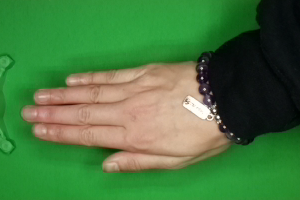

In [6]:
random_image = random.sample(os.listdir(paper_dir), 1)
img = tf.keras.utils.load_img(f"{paper_dir}/{random_image[0]}")
img

In [8]:
img = tf.keras.utils.img_to_array(img)
img.shape

(200, 300, 3)

In [9]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="training",
  image_size=(180,180),
  batch_size=32,
  seed=42)

Found 2188 files belonging to 3 classes.
Using 1751 files for training.


In [10]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  base_dir,
  validation_split=0.2,
  subset="validation",
  image_size=(180,180),
  batch_size=32,
  seed=42)

Found 2188 files belonging to 3 classes.
Using 437 files for validation.


In [11]:
class_names = train_ds.class_names
class_names

['paper', 'rock', 'scissors']

In [12]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


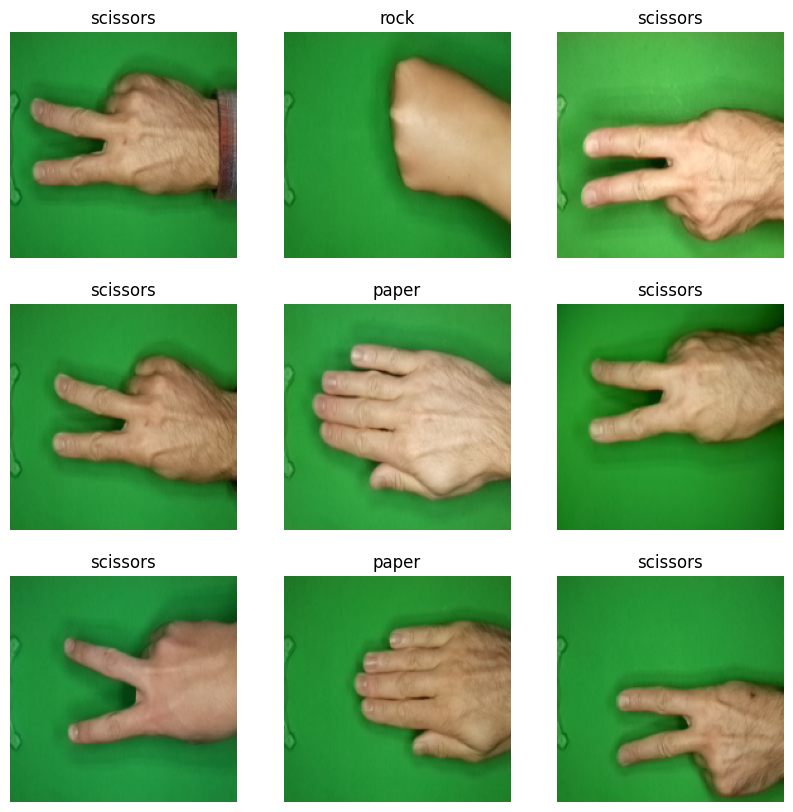

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [14]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [15]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal_and_vertical", seed=42),
  tf.keras.layers.RandomRotation(0.1, seed=42),
])

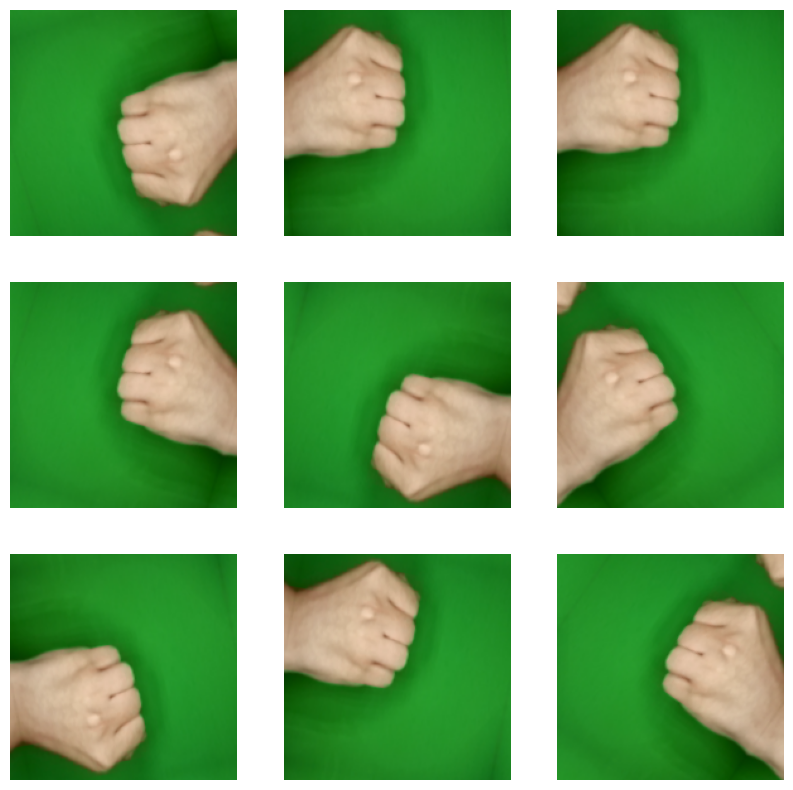

In [16]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [17]:
NUM_CLASSES = len(class_names)
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    data_augmentation,
    # The first CNN layer
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # The second CNN layer
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # The third CNN layer
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    # The fourth CNN layer
    tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES)
])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 128)       0         
 g2D)                                                 

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [20]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15,
)

Epoch 1/15


55/55 [==============================] - 90s 2s/step - loss: 1.1599 - accuracy: 0.3341 - val_loss: 1.1061 - val_accuracy: 0.2998
Epoch 2/15
55/55 [==============================] - 104s 2s/step - loss: 1.0057 - accuracy: 0.4854 - val_loss: 0.6767 - val_accuracy: 0.7574
Epoch 3/15
55/55 [==============================] - 126s 2s/step - loss: 0.4187 - accuracy: 0.8372 - val_loss: 0.1750 - val_accuracy: 0.9428
Epoch 4/15
55/55 [==============================] - 90s 2s/step - loss: 0.3278 - accuracy: 0.8841 - val_loss: 0.1575 - val_accuracy: 0.9497
Epoch 5/15
55/55 [==============================] - 105s 2s/step - loss: 0.2626 - accuracy: 0.9041 - val_loss: 0.1007 - val_accuracy: 0.9634
Epoch 6/15
55/55 [==============================] - 100s 2s/step - loss: 0.2138 - accuracy: 0.9183 - val_loss: 0.0853 - val_accuracy: 0.9703
Epoch 7/15
55/55 [==============================] - 90s 2s/step - loss: 0.1954 - accuracy: 0.9292 - val_loss: 0.1090 - val_accuracy: 0.9657
Epoch 8/15
55/

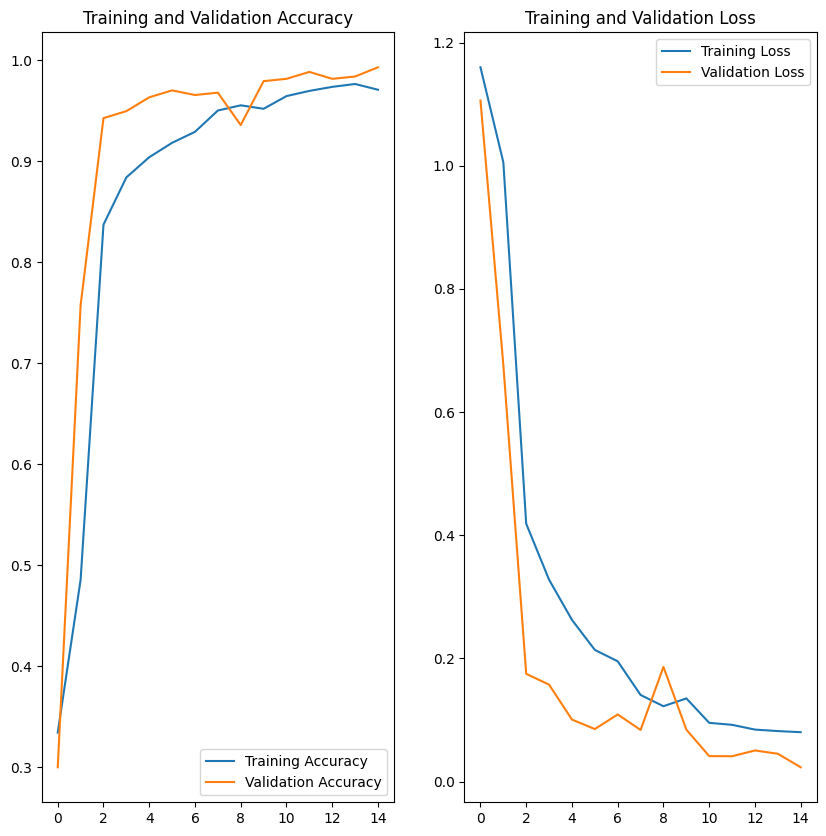

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [23]:
random_image = random.sample(os.listdir(paper_dir), 1)
img = tf.keras.utils.load_img(f"{paper_dir}/{random_image[0]}", target_size=(180, 180))

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 38ms/step
This image most likely belongs to paper with a 99.03 percent confidence.
